In [1]:
import pandas as pd 
import pip._vendor.requests as requests
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from  sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
scope1 = "user-library-read"


In [2]:
df_total = pd.read_csv("total.csv")
df_total
df_total.loc[df_total["tag"] == "calm", "tag"] = 0
df_total.loc[df_total["tag"] == "happy", "tag"] = 1
df_total.loc[df_total["tag"] == "energ", "tag"] = 2
df_total.loc[df_total["tag"] == "sad", "tag"] = 3

In [3]:
df_calm = pd.read_csv("soft_mix.csv")
df_calm = df_calm.drop(columns=['Spotify ID', 'Artist IDs', 'Track Name', 'Album Name', 'Artist Name(s)', 'Release Date', 
                                'Duration (ms)', 'Genres', 'Popularity', 'Added By', 'Added At', 'Mode', 'Time Signature'])
df_calm["tag"]=0


df_energ = pd.read_csv("hype_workout_mix.csv")
df_energ = df_energ.drop(columns=['Spotify ID', 'Artist IDs', 'Track Name', 'Album Name', 'Artist Name(s)', 'Release Date', 
                                'Duration (ms)', 'Genres', 'Popularity', 'Added By', 'Added At', 'Mode', 'Time Signature'])
df_energ["tag"]=2

df_happy = pd.read_csv("feel_good_happy_mix.csv")
df_happy = df_happy.drop(columns=['Spotify ID', 'Artist IDs', 'Track Name', 'Album Name', 'Artist Name(s)', 'Release Date', 
                                'Duration (ms)', 'Genres', 'Popularity', 'Added By', 'Added At', 'Mode', 'Time Signature'])
df_happy["tag"]=1

df_sad = pd.read_csv("lonely_sad_mix.csv")
df_sad = df_sad.drop(columns=['Spotify ID', 'Artist IDs', 'Track Name', 'Album Name', 'Artist Name(s)', 'Release Date', 
                                'Duration (ms)', 'Genres', 'Popularity', 'Added By', 'Added At', 'Mode', 'Time Signature'])
df_sad["tag"]=3

In [4]:
min_value = df_calm[["Tempo"]].min()
max_value = df_calm[["Tempo"]].max()
df_calm["Tempo"] = (df_calm[["Tempo"]] - min_value) / (max_value - min_value)

min_value = df_calm[["Loudness"]].min()
max_value = df_calm[["Loudness"]].max()
df_calm["Loudness"] = (df_calm[["Loudness"]] - min_value) / (max_value - min_value)

min_value = df_calm[["Key"]].min()
max_value = df_calm[["Key"]].max()
df_calm["Key"] = (df_calm[["Key"]] - min_value) / (max_value - min_value)



min_value = df_energ[["Tempo"]].min()
max_value = df_energ[["Tempo"]].max()
df_energ["Tempo"] = (df_energ[["Tempo"]] - min_value) / (max_value - min_value)

min_value = df_energ[["Loudness"]].min()
max_value = df_energ[["Loudness"]].max()
df_energ["Loudness"] = (df_energ[["Loudness"]] - min_value) / (max_value - min_value)

min_value = df_energ[["Key"]].min()
max_value = df_energ[["Key"]].max()
df_energ["Key"] = (df_energ[["Key"]] - min_value) / (max_value - min_value)



min_value = df_happy[["Tempo"]].min()
max_value = df_happy[["Tempo"]].max()
df_happy["Tempo"] = (df_happy[["Tempo"]] - min_value) / (max_value - min_value)

min_value = df_happy[["Loudness"]].min()
max_value = df_happy[["Loudness"]].max()
df_happy["Loudness"] = (df_happy[["Loudness"]] - min_value) / (max_value - min_value)

min_value = df_happy[["Key"]].min()
max_value = df_happy[["Key"]].max()
df_happy["Key"] = (df_happy[["Key"]] - min_value) / (max_value - min_value)



min_value = df_sad[["Tempo"]].min()
max_value = df_sad[["Tempo"]].max()
df_sad["Tempo"] = (df_sad[["Tempo"]] - min_value) / (max_value - min_value)

min_value = df_sad[["Loudness"]].min()
max_value = df_sad[["Loudness"]].max()
df_sad["Loudness"] = (df_sad[["Loudness"]] - min_value) / (max_value - min_value)

min_value = df_sad[["Key"]].min()
max_value = df_sad[["Key"]].max()
df_sad["Key"] = (df_sad[["Key"]] - min_value) / (max_value - min_value)

In [14]:
# Normalize the DataFrame to be between 0 and 1
min_value = df_total[["Tempo"]].min()
max_value = df_total[["Tempo"]].max()
df_total["Tempo"] = (df_total[["Tempo"]] - min_value) / (max_value - min_value)

min_value = df_total[["Loudness"]].min()
max_value = df_total[["Loudness"]].max()
df_total["Loudness"] = (df_total[["Loudness"]] - min_value) / (max_value - min_value)

min_value = df_total[["Key"]].min()
max_value = df_total[["Key"]].max()
df_total["Key"] = (df_total[["Key"]] - min_value) / (max_value - min_value)


data = df_total[["Danceability", "Energy", "Key", "Loudness", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Valence", "Tempo"]]
data_target = df_total[["tag"]].astype(int)

data_calm = df_calm[["Danceability", "Energy", "Key", "Loudness", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Valence", "Tempo"]]
# data_calm_target = df_calm[["tag"]].astype(int)

In [15]:
song_x_train, song_x_test, song_y_train, song_y_test = train_test_split(data, data_target, test_size= 0.2, random_state= 42, shuffle=True)
df_result = []

for i in range(1):
    model = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes= (16, 10,), activation= "logistic",max_iter= 1000, learning_rate_init= 0.01, alpha = 0.01), n_jobs = -1)
    # data_calm = np.ravel(data_calm)
    # data_calm_target = np.ravel(data_calm_target)
    model.fit(song_x_train,song_y_train)
    data_calm["predict"] = model.predict(data_calm)
    # output = {"RMSE": np.sqrt(mean_squared_error(data_calm_target,data_predict)), "accuracy_score":metrics.accuracy_score(data_calm_target, data_predict)}
    # df_result.append(output)
        # print("RMSE", np.sqrt(mean_squared_error(song_y_test,song_y_predict)))
        # print(metrics.accuracy_score(song_y_test, song_y_predict))
        # print("------")
# df_output = pd.DataFrame(df_result)
# df_output
data_calm

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,predict
0,0.502,0.1680,0.0,0.612305,0.0355,0.969,0.9710,0.1110,0.1580,0.931370,0
1,0.270,0.1880,0.8,0.449978,0.0404,0.978,0.9700,0.1090,0.0850,0.299195,0
2,0.547,0.1930,0.5,0.657986,0.0386,0.953,0.7350,0.1910,0.2210,1.000000,3
3,0.531,0.2110,0.5,0.601780,0.0361,0.928,0.7970,0.0939,0.2060,0.178200,0
4,0.515,0.1320,0.5,0.351454,0.0372,0.962,0.9390,0.1090,0.1430,0.000000,0
5,0.542,0.0817,0.0,0.238607,0.0384,0.930,0.2350,0.1080,0.2880,0.367613,0
6,0.483,0.1670,0.5,0.720703,0.0341,0.936,0.9000,0.0863,0.1690,0.595416,0
7,0.255,0.0745,0.0,0.174696,0.0395,0.863,0.1280,0.1330,0.1790,0.338543,0
8,0.418,0.1530,0.8,0.251194,0.0352,0.956,0.9030,0.0960,0.0627,0.984071,0
9,0.513,0.2590,0.2,0.961697,0.0315,0.918,0.8070,0.1070,0.1070,0.362735,3


(array([ 0.69687476,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.39374951,  1.39374951,  2.78749902,  3.48437378,
         6.2718728 ,  3.48437378,  8.36249707,  9.75624658, 11.14999609,
        12.5437456 , 11.84687085, 20.20936791, 20.20936791, 27.17811547,
        37.6312368 , 34.14686302, 27.87499022, 36.23748729, 26.48124071,
        50.87185716, 28.57186498, 37.6312368 , 36.93436205, 30.66248925,
        32.75311351, 31.359364  , 23.69374169, 22.29999218, 20.90624267,
        12.5437456 , 13.24062036, 16.02811938,  8.36249707,  6.96874756,
         5.57499804,  5.57499804,  4.18124853,  0.69687476,  1.39374951,
         0.        ,  0.69687476,  0.69687476,  1.39374951,  0.69687476]),
 array([0.66261867, 0.66405364, 0.66548862, 0.6669236 , 0.66835858,
        0.66979356, 0.67122853, 0.67266351, 0.67409849, 0.67553347,
        0.67696845, 0.67840343, 0.6798384 , 0.68127338, 0.68270836,
        0.68414334, 0.68557832, 0.68701329, 0.68844827, 0.689883

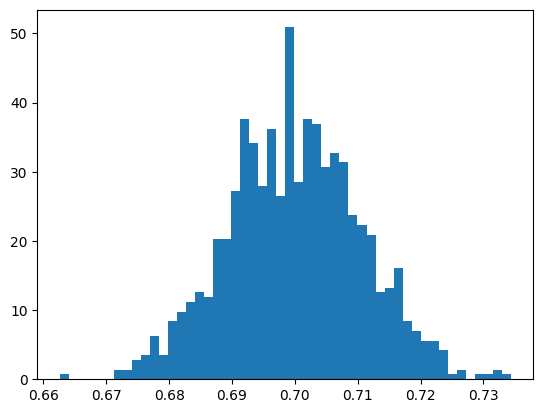

In [ ]:
mean = df_output["accuracy_score"].mean()
std = df_output["accuracy_score"].std()
normal = np.random.normal(mean, std, size = len(df_output))
plt.hist(normal, bins = 50, density= True)

In [ ]:
song_y_test_copy = [0] * song_y_test.size
song_y_predict_copy = [0] * song_y_predict.size

for i in range(song_y_test.size):
    song_y_test_copy[i] = song_y_test[i]
for i in range(song_y_predict.size):
    song_y_predict_copy[i] = song_y_predict[i]

for i in range(data_predict.size):
    if song_y_test_copy[i] == 0:
        song_y_test_copy[i] = 'calm'
    if song_y_test_copy[i] == 1:
        song_y_test_copy[i] = 'happy'
    if song_y_test_copy[i] == 2:
        song_y_test_copy[i] = 'energ'
    if song_y_test_copy[i] == 3:
        song_y_test_copy[i] = 'sad'

for i in range(data_predict.size):
    if song_y_predict_copy[i] == 0:
        song_y_predict_copy[i] = 'calm'
    if song_y_predict_copy[i] == 1:
        song_y_predict_copy[i] = 'happy'
    if song_y_predict_copy[i] == 2:
        song_y_predict_copy[i] = 'energ'
    if song_y_predict_copy[i] == 3:
        song_y_predict_copy[i] = 'sad'

compare = pd.DataFrame({'mood': song_y_test_copy, 'predicted': song_y_predict_copy})
compare

,mood,predicted
0,sad,sad
1,calm,calm
2,calm,calm
3,energ,sad
4,calm,calm
...,...,...
296,calm,calm
297,happy,energ
298,calm,calm
299,calm,calm
